## Analysis of currents in the Bay of Bengal

In [55]:
import matplotlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as crs
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 
import cartopy

In [56]:
matplotlib.rcParams.update({'font.size': 20})    

In [58]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor= 'k')

#### Open the currents dataset 
Dataset available from: www.mosdac.gov.in

In [57]:
curr = xr.open_dataset("./Satellite_Data_SAC/ISRO_CURRENT_BOB_2018.nc")

In [3]:
curr

<xarray.Dataset>
Dimensions:    (Depth: 1, Latitude: 81, Longitude: 89, Time: 346)
Coordinates:
  * Time       (Time) datetime64[ns] 2017-12-30 2017-12-31 ... 2018-12-27
  * Longitude  (Longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
  * Latitude   (Latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * Depth      (Depth) float64 15.0
Data variables:
    U          (Time, Depth, Latitude, Longitude) float32 ...
    V          (Time, Depth, Latitude, Longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.4 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Fri Feb 15 15:46:05 2019: cdo sellonlatbox,78,100,5,25 ISRO...
    CDO:          Climate Data Operators version 1.9.4 (http://mpimet.mpg.de/...

In [20]:
curr.U.sel(Depth=15, Time="2017-12-30")

<xarray.DataArray 'U' (Latitude: 81, Longitude: 89)>
array([[-1.026, -1.079, -1.12 , ...,  0.387,  0.569,  0.692],
       [-0.979, -1.011, -1.025, ...,  0.152,  0.28 ,  0.4  ],
       [-0.784, -0.812, -0.765, ..., -0.045,  0.035,  0.183],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]], dtype=float32)
Coordinates:
    Time       datetime64[ns] 2017-12-30
  * Longitude  (Longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
  * Latitude   (Latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
    Depth      float64 15.0
Attributes:
    units:    m/s

In [24]:
curr.Longitude

<xarray.DataArray 'Longitude' (Longitude: 89)>
array([ 78.  ,  78.25,  78.5 ,  78.75,  79.  ,  79.25,  79.5 ,  79.75,  80.  ,
        80.25,  80.5 ,  80.75,  81.  ,  81.25,  81.5 ,  81.75,  82.  ,  82.25,
        82.5 ,  82.75,  83.  ,  83.25,  83.5 ,  83.75,  84.  ,  84.25,  84.5 ,
        84.75,  85.  ,  85.25,  85.5 ,  85.75,  86.  ,  86.25,  86.5 ,  86.75,
        87.  ,  87.25,  87.5 ,  87.75,  88.  ,  88.25,  88.5 ,  88.75,  89.  ,
        89.25,  89.5 ,  89.75,  90.  ,  90.25,  90.5 ,  90.75,  91.  ,  91.25,
        91.5 ,  91.75,  92.  ,  92.25,  92.5 ,  92.75,  93.  ,  93.25,  93.5 ,
        93.75,  94.  ,  94.25,  94.5 ,  94.75,  95.  ,  95.25,  95.5 ,  95.75,
        96.  ,  96.25,  96.5 ,  96.75,  97.  ,  97.25,  97.5 ,  97.75,  98.  ,
        98.25,  98.5 ,  98.75,  99.  ,  99.25,  99.5 ,  99.75, 100.  ],
      dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
Attributes:
    standard_name:  longitude
    long_name:  

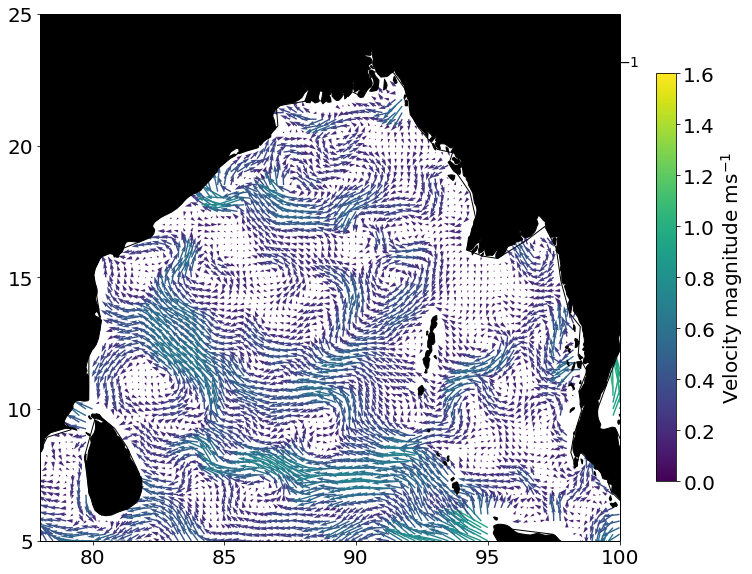

In [59]:
plt.close(1)
plt.figure(1, figsize=(15, 15))
gs = gridspec.GridSpec(3, 2, height_ratios=[0.1, 1, 0.1], width_ratios=[1, 0.05])
ax = plt.subplot(gs[:,0], projection=crs.PlateCarree())
ax.coastlines()
u = curr.U.sel(Depth=15, Time=curr.Time.values[40]).values
v = curr.V.sel(Depth=15, Time=curr.Time.values[40]).values
mag = np.sqrt(u**2 + v**2)

Q = plt.quiver(curr.Longitude, curr.Latitude, u, v, mag, scale=15)
ax.set_extent([78, 100, 5, 25])
ax.set_xticks(np.arange(80, 101, 5) )
ax.set_yticks(np.arange(5, 26, 5) )
ax.quiverkey(Q, 0.9, 0.9, 1, '1 ms$^{-1}$', labelpos='E')
ax.add_feature(land_50m)

plt.text(80,20, str.split(str(curr.time.values), 'T')[0], color='0.99')

plt.colorbar(Q, plt.clim(0,1.6), ax=ax, shrink=0.5, label="Velocity magnitude ms$^{-1}$")
plt.show()

In [23]:
str.split(str(t.values), 'T')[0]

'2018-12-27'

In [20]:
np.where(curr.Time == np.datetime64("2018-05-01") )

(array([116]),)

In [21]:
np.where(curr.Time == np.datetime64("2018-10-31") )

(array([288]),)

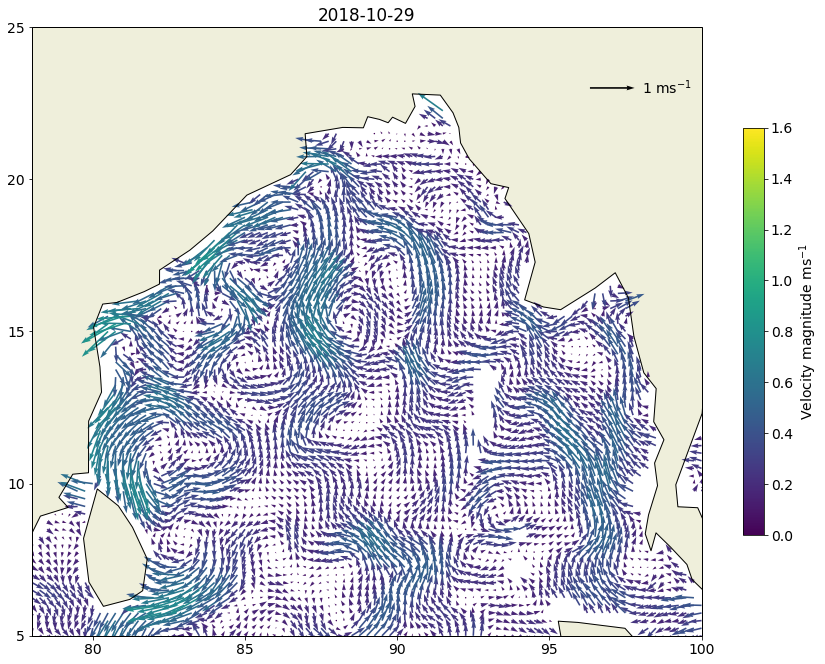

In [73]:
for tind in range(116, 288, 5):
    t = curr.Time[tind]
    plt.close(1)
    plt.figure(1, figsize=(15, 15))
    gs = gridspec.GridSpec(3, 2, height_ratios=[0.1, 1, 0.1], width_ratios=[1, 0.05])
    ax = plt.subplot(gs[:, :], projection=crs.PlateCarree())
    ax.coastlines()
    u = curr.U.sel(Depth=15, Time= t.values).values
    v = curr.V.sel(Depth=15, Time= t.values).values
    mag = np.sqrt(u**2 + v**2) #magnitude of velocity
    
    Q = plt.quiver(curr.Longitude, curr.Latitude, u, v, mag, scale=15)
    #X,Y = np.meshgrid(curr.Longitude, curr.Latitude)
    #S = ax.scatter(X, Y, c=mag, s=10, vmin=0, vmax=1.5)
    ax.set_extent([78, 100, 5, 25])
    ax.set_xticks(np.arange(80, 101, 5) )
    ax.set_yticks(np.arange(5, 26, 5) )
    ax.quiverkey(Q, 0.9, 0.9, 1, '1 ms$^{-1}$', labelpos='E')
    
    ax.set_title(str.split(str(t.values), 'T')[0])
    ax.add_feature(cartopy.feature.LAND)
    #ax.contourf(longrid, latgrid, bathyS.elevation.where(bathyS.elevation > 0).values, cmap='Greens' )
    plt.colorbar(Q, plt.clim(0,1.6), ax=ax, shrink=0.5, label="Velocity magnitude ms$^{-1}$")
    plt.savefig("./animations/currents/"+str(t.values)+".png")

In [28]:
!convert -delay 100 -loop 0 ./animations/currents/*.png ./animations/currents/animation.gif

In [25]:
!rm ./animations/currents/*.png

In [4]:
sla = xr.open_dataset("./Satellite_Data_SAC/sla_BOB_2018.nc")

In [30]:
sla

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 88, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * longitude  (longitude) float32 78.125 78.375 78.625 ... 99.375 99.625 99.875
  * latitude   (latitude) float32 5.125 5.375 5.625 ... 24.375 24.625 24.875
Data variables:
    adt        (time, latitude, longitude) float64 ...
Attributes:
    CDI:                             Climate Data Interface version 1.9.4 (ht...
    Conventions:                     CF-1.6
    history:                         Fri Feb 15 15:49:27 2019: cdo sellonlatb...
    source:                          Altimetry measurements
    institution:                     CLS, CNES
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:    

Hovmoller plots for SLA
1. Time vs Long 78 - 100 (avgd. over 14N to 18N)
1. Time Lat 5 - 25 (avgd. over 87E to 89E)

In [6]:
sla_anom = sla.adt - sla.adt.mean(dim='time')

/home/aditya/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
sla_anom.name = "SLA(m)"

In [25]:
sla_anom.quantile(0.99)

<xarray.DataArray 'SLA(m)' ()>
array(0.23631)
Coordinates:
    quantile  float64 0.99

In [34]:
str.split(str(t.values), 'T')[0]

'2018-09-28'

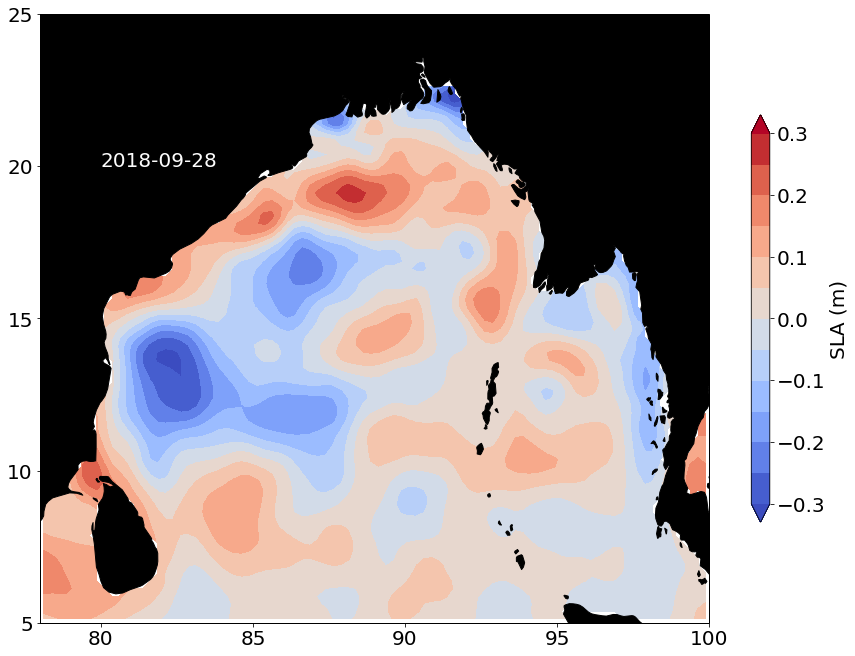

In [54]:
plt.close(1)
plt.figure(1, figsize=(15, 15))
ax = plt.subplot(projection=crs.PlateCarree())
#ax.coastlines()

Q = plt.contourf(sla_anom.longitude, sla_anom.latitude, sla_anom.isel(time=0), vmin=-0.3, vmax=0.3, 
                 levels=np.arange(-0.3, 0.31, 0.05), extend='both', cmap='coolwarm')
ax.set_extent([78, 100, 5, 25])
ax.set_xticks(np.arange(80, 101, 5) )
ax.set_yticks(np.arange(5, 26, 5) )

ax.add_feature(land_50m)
plt.text(80,20, str.split(str(t.values), 'T')[0], color='0.99')
#longrid, latgrid = np.meshgrid(bathyS.lon.values, bathyS.lat.values)
#ax.contourf(longrid, latgrid, bathyS.elevation.where(bathyS.elevation > 0).values, cmap='Greens' )

plt.colorbar(Q, ax=ax, shrink=0.5, label="SLA (m)")
plt.show()

In [42]:
np.where(sla_anom.time == np.datetime64("2018-10-31") )

(array([303]),)

In [ ]:
sla_anom

In [52]:
!mkdir ./animations/sla/

In [54]:
sla_anom.time

<xarray.DataArray 'time' (time: 365)>
array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', ..., '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

SystemError: <built-in method write of _io.BufferedWriter object at 0x7f689823c728> returned a result with an error set

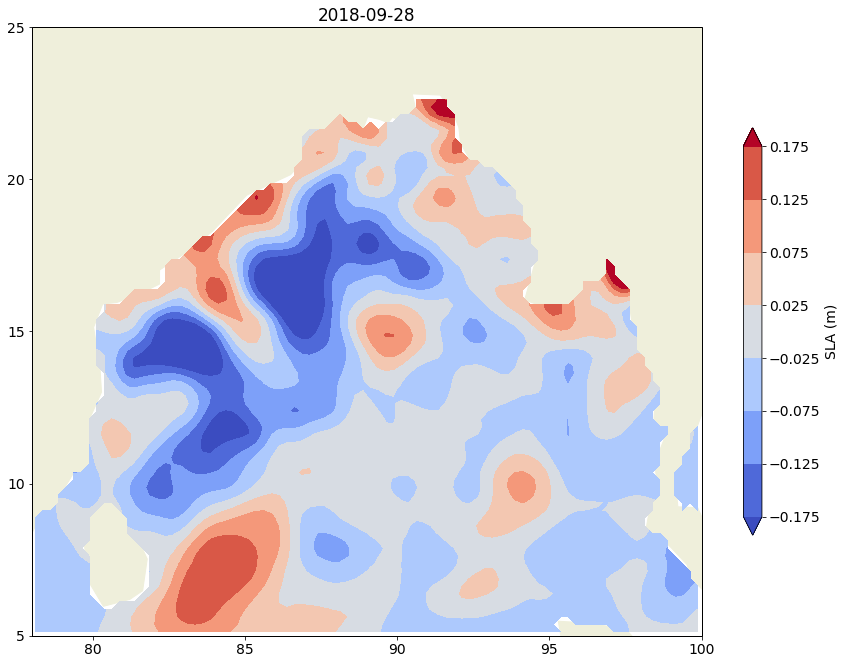

In [16]:
for tind in range(90, 304, 5):
    t = sla_anom.time[tind]
    plt.close(1)
    plt.figure(1, figsize=(15, 15))
    ax = plt.subplot(projection=crs.PlateCarree())
    #ax.coastlines()

    CF = plt.contourf(sla_anom.longitude, sla_anom.latitude, sla_anom.sel(time=t), vmin=-0.3, vmax=0.3, 
                 levels=np.arange(-0.175, 0.19, 0.05), extend='both', cmap='coolwarm')
    ax.set_extent([78, 100, 5, 25])
    ax.set_xticks(np.arange(80, 101, 5) )
    ax.set_yticks(np.arange(5, 26, 5) )

    ax.add_feature(cartopy.feature.LAND)

    #longrid, latgrid = np.meshgrid(bathyS.lon.values, bathyS.lat.values)
    #ax.contourf(longrid, latgrid, bathyS.elevation.where(bathyS.elevation > 0).values, cmap='Greens' )

    plt.colorbar(CF, ax=ax, shrink=0.5, label="SLA (m)")
    plt.title(str.split(str(t.values), 'T')[0])
    plt.savefig("./animations/sla/"+str.split(str(t.values), 'T')[0]+".png" )

In [67]:
!convert -delay 100 -loop 0 ./animations/sla/*.png ./animations/sla/sla.gif

/home/aditya/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


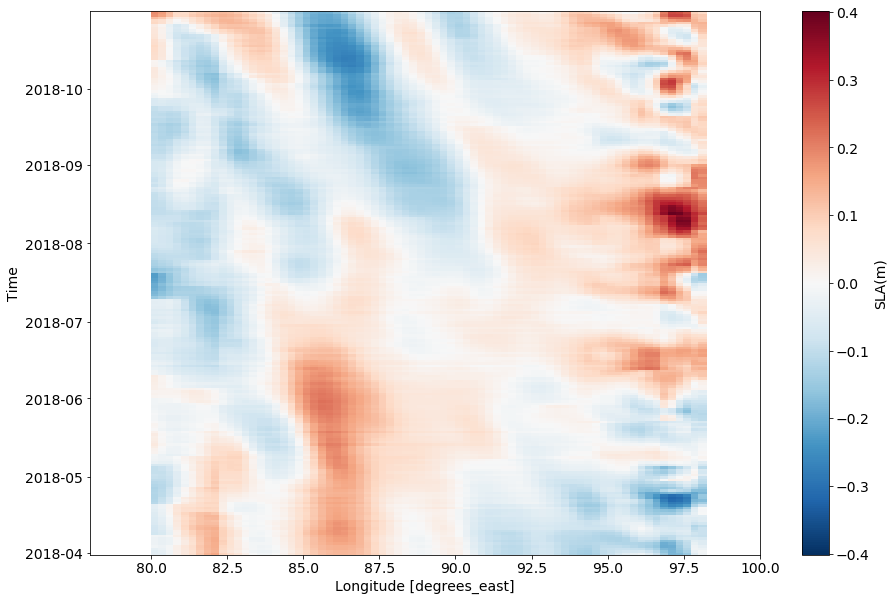

In [27]:
plt.figure(figsize=(15,10))
#ax = plt.subplot(projection = crs.PlateCarree())
sla_anom_plt = sla_anom.sel(latitude=slice(14, 18), time=slice("2018-04-01", "2018-10-31")).mean(dim="latitude").plot()
#plt.colorbar(sla_anom_plt)
plt.show()

/home/aditya/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


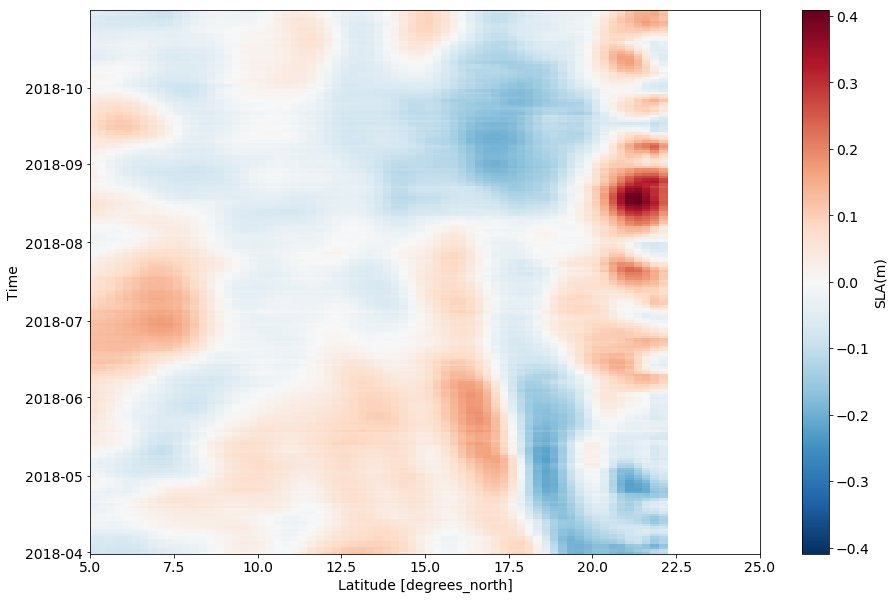

In [29]:
plt.figure(figsize=(15,10))
#ax = plt.subplot(projection = crs.PlateCarree())
sla_anom_plt = sla_anom.sel(longitude=slice(87, 89), time=slice("2018-04-01", "2018-10-31")).mean(dim="longitude").plot()
#plt.colorbar(sla_anom_plt)
plt.show()

## Whole Bay : 78E to 100E; 5N to 25N
## North Bay: 78E to 100E; 16N to 25N
## SW Bay: 78E to 89E; 5N to 16N
## SE Bay: 89E to 100E; 5N to 16N

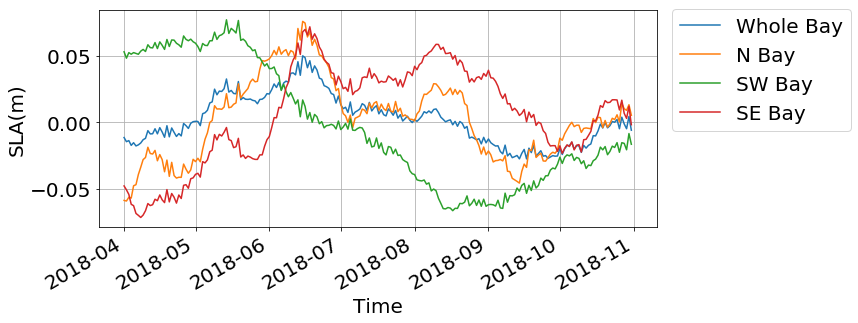

In [63]:
plt.figure(figsize=(10, 4))
sla_anom.sel(longitude=slice(78, 100), latitude=slice(5, 25), time=slice("2018-04-01", "2018-10-31")).\
mean(dim=['longitude', 'latitude']).plot(label="Whole Bay")

sla_anom.sel(longitude=slice(78, 100), latitude=slice(16, 25), time=slice("2018-04-01", "2018-10-31")).\
mean(dim=['longitude', 'latitude']).plot(label="N Bay")

sla_anom.sel(longitude=slice(78, 89), latitude=slice(5, 16), time=slice("2018-04-01", "2018-10-31")).\
mean(dim=['longitude', 'latitude']).plot(label="SW Bay")

sla_anom.sel(longitude=slice(89, 100), latitude=slice(5, 16), time=slice("2018-04-01", "2018-10-31")).\
mean(dim=['longitude', 'latitude']).plot(label="SE Bay")

plt.legend(bbox_to_anchor=(1.01, 1.05))
plt.grid()
plt.show()

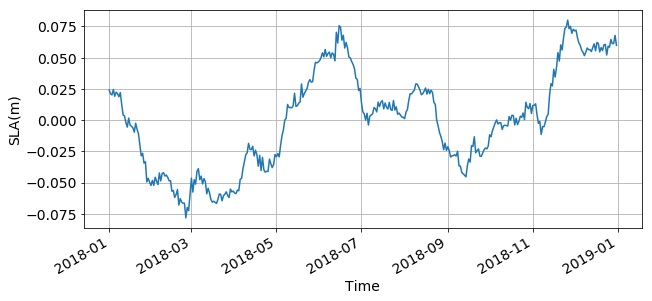

In [63]:
plt.figure(figsize=(10, 4))
sla_anom.sel(longitude=slice(78, 100), latitude=slice(16, 25)).mean(dim=['longitude', 'latitude']).plot()
plt.grid()
plt.show()

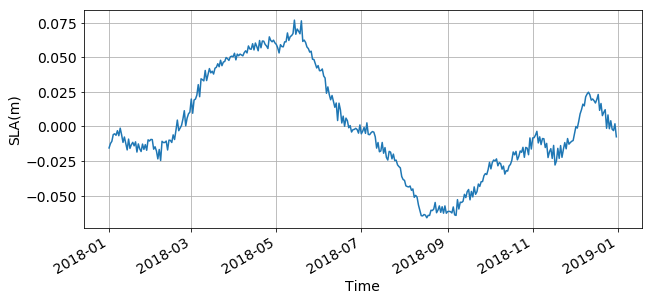

In [8]:
plt.figure(figsize=(10, 4))
sla_anom.sel(longitude=slice(78, 89), latitude=slice(5, 16)).mean(dim=['longitude', 'latitude']).plot()
plt.grid()
plt.show()

In [68]:
duacs = xr.open_dataset("./Satellite_Data_SAC/dataset-duacs-nrt-global-merged-allsat-phy-l4_1549625798751.nc")

In [69]:
duacs

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 321, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
  * latitude   (latitude) float32 -29.875 -29.625 -29.375 ... 29.875 30.125
  * longitude  (longitude) float32 40.125 40.375 40.625 ... 119.875 120.125
Data variables:
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         s

In [72]:
duacs.vgosa.comment

'The geostrophic velocity anomalies are referenced to the [1993, 2012] period'